In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
file_path = 'W04-IrisData.csv'
data = pd.read_csv(file_path)

In [3]:
# Use boolean indexing to filter data for Versicolor and Virginica
filtered_data = data[(data['Species'] == 'Iris-versicolor') | (data['Species'] == 'Iris-virginica')]

In [4]:
# Select features Petal Length and Sepal Width
extracted_features = filtered_data[['PetalLengthCm', 'SepalWidthCm', 'Species']]

# Display the extracted features
print(extracted_features)

     PetalLengthCm  SepalWidthCm          Species
50             4.7           3.2  Iris-versicolor
51             4.5           3.2  Iris-versicolor
52             4.9           3.1  Iris-versicolor
53             4.0           2.3  Iris-versicolor
54             4.6           2.8  Iris-versicolor
..             ...           ...              ...
145            5.2           3.0   Iris-virginica
146            5.0           2.5   Iris-virginica
147            5.2           3.0   Iris-virginica
148            5.4           3.4   Iris-virginica
149            5.1           3.0   Iris-virginica

[100 rows x 3 columns]


In [5]:
# Separate the data by species
versicolor = extracted_features[extracted_features['Species'] == 'Iris-versicolor']
virginica = extracted_features[extracted_features['Species'] == 'Iris-virginica']

In [6]:
# Create training and test sets
train_versicolor = versicolor.head(40)
test_versicolor = versicolor.tail(10)
train_virginica = virginica.head(40)
test_virginica = virginica.tail(10)

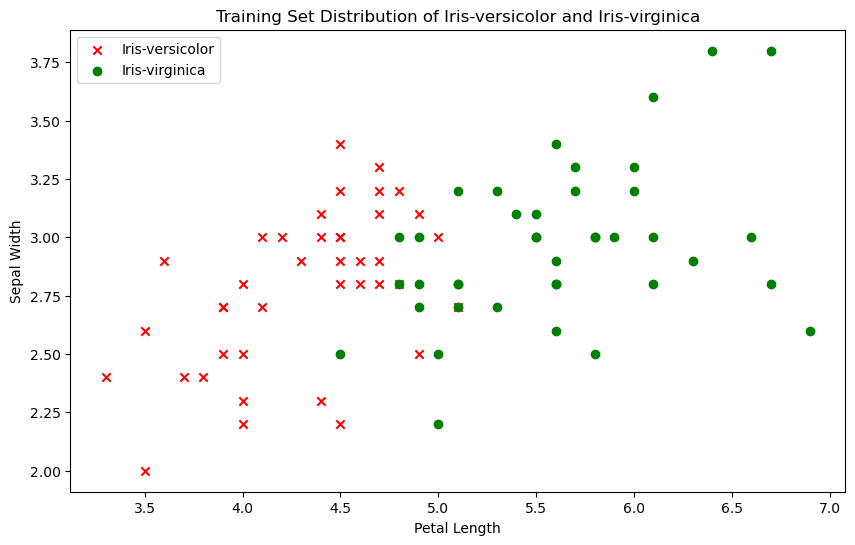

In [7]:
# Plot the training set with different colors and shapes
plt.figure(figsize=(10, 6))
plt.scatter(train_versicolor['PetalLengthCm'], train_versicolor['SepalWidthCm'], 
            color='red', marker='x', label='Iris-versicolor')
plt.scatter(train_virginica['PetalLengthCm'], train_virginica['SepalWidthCm'], 
            color='green', marker='o', label='Iris-virginica')

plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title('Training Set Distribution of Iris-versicolor and Iris-virginica')
plt.show()

In [8]:
# Function to calculate errors
def calculate_errors(data, k, b):
    predictions = data['PetalLengthCm'] * k + b
    errors = np.sum((predictions > data['SepalWidthCm']) != (data['Species'] == 'Iris-virginica'))
    return errors

In [9]:
# Define the decision rule function
def decision_rule(petal_length, k, b):
    return petal_length * k + b


In [10]:
# Example decision rule for a given (k, b)
k_example = 1.0
b_example = -3.0

# Calculate errors for training and test sets using the example (k, b)
train_data = pd.concat([train_versicolor, train_virginica])
test_data = pd.concat([test_versicolor, test_virginica])

train_errors = calculate_errors(train_data, k_example, b_example)
test_errors = calculate_errors(test_data, k_example, b_example)

print(f"Training errors with k={k_example} and b={b_example}: {train_errors}")
print(f"Test errors with k={k_example} and b={b_example}: {test_errors}")

Training errors with k=1.0 and b=-3.0: 33
Test errors with k=1.0 and b=-3.0: 10


In [11]:
# Function to search for optimum (k, b) values
def search_optimum_kb(train_data, test_data, k_values, b_values):
    results = []
    for k in k_values:
        for b in b_values:
            train_errors = calculate_errors(train_data, k, b)
            test_errors = calculate_errors(test_data, k, b)
            results.append((k, b, train_errors, test_errors))
    return results

In [12]:
# Define the range of k and b values to search
k_values = np.linspace(-2, 2, 100)
b_values = np.linspace(-10, 10, 100)

In [13]:
# Search for the optimum (k, b)
results = search_optimum_kb(train_data, test_data, k_values, b_values)

In [14]:
# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['k', 'b', 'train_errors', 'test_errors'])

# Find the combination with the minimum test error
optimum = results_df.loc[results_df['test_errors'].idxmin()]

In [15]:
# Plotting the linear classifier and sample distributions
def plot_classifier(train_data, test_data, k, b):
    plt.figure(figsize=(12, 6))
    
    # Plot training set
    plt.subplot(1, 2, 1)
    plt.scatter(train_data[train_data['Species'] == 'Iris-versicolor']['PetalLengthCm'], 
                train_data[train_data['Species'] == 'Iris-versicolor']['SepalWidthCm'], 
                color='red', marker='x', label='Iris-versicolor')
    plt.scatter(train_data[train_data['Species'] == 'Iris-virginica']['PetalLengthCm'], 
                train_data[train_data['Species'] == 'Iris-virginica']['SepalWidthCm'], 
                color='green', marker='o', label='Iris-virginica')
    
    # Plot decision boundary
    x_vals = np.array([train_data['PetalLengthCm'].min(), train_data['PetalLengthCm'].max()])
    y_vals = -(k * x_vals + b)
    plt.plot(x_vals, y_vals, '--', color='blue', label='Decision Boundary')
    
    plt.xlabel('Petal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.title('Training Set Distribution and Classifier')
    
    # Plot testing set
    plt.subplot(1, 2, 2)
    plt.scatter(test_data[test_data['Species'] == 'Iris-versicolor']['PetalLengthCm'], 
                test_data[test_data['Species'] == 'Iris-versicolor']['SepalWidthCm'], 
                color='red', marker='x', label='Iris-versicolor')
    plt.scatter(test_data[test_data['Species'] == 'Iris-virginica']['PetalLengthCm'], 
                test_data[test_data['Species'] == 'Iris-virginica']['SepalWidthCm'], 
                color='green', marker='o', label='Iris-virginica')
    
    # Plot decision boundary
    plt.plot(x_vals, y_vals, '--', color='blue', label='Decision Boundary')
    
    plt.xlabel('Petal Length')
    plt.ylabel('Sepal Width')
    plt.legend()
    plt.title('Testing Set Distribution and Classifier')
    
    plt.tight_layout()
    plt.show()

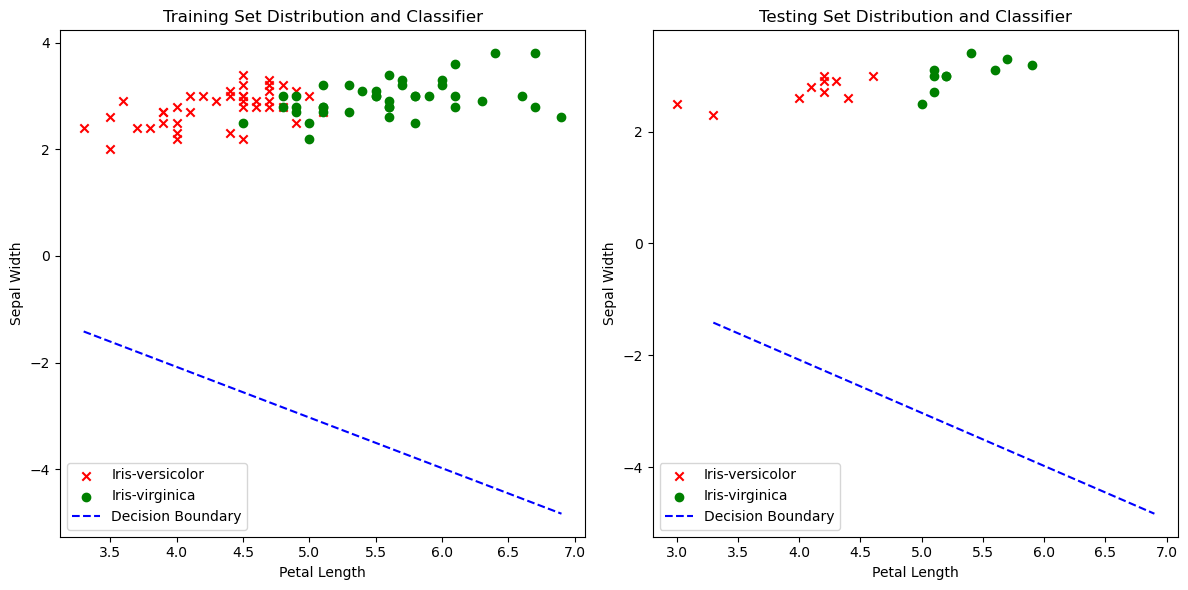

Optimum (k, b) values and Errors:
k               0.949495
b              -1.717172
train_errors    9.000000
test_errors     0.000000
Name: 7341, dtype: float64

Results Table:
        k          b  train_errors  test_errors
0    -2.0 -10.000000            40           10
1    -2.0  -9.797980            40           10
2    -2.0  -9.595960            40           10
3    -2.0  -9.393939            40           10
4    -2.0  -9.191919            40           10
...   ...        ...           ...          ...
9995  2.0   9.191919            40           10
9996  2.0   9.393939            40           10
9997  2.0   9.595960            40           10
9998  2.0   9.797980            40           10
9999  2.0  10.000000            40           10

[10000 rows x 4 columns]


In [16]:
# Plot the optimum classifier
plot_classifier(train_data, test_data, k=optimum['k'], b=optimum['b'])

# Display the results table
print("Optimum (k, b) values and Errors:")
print(optimum)
print("\nResults Table:")
print(results_df)